In [2]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv(
    "data/round3/prices_round_3_day_0.csv",
    sep = ';'
)

In [5]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.0
1,0,0,PEARLS,9998.0,1.0,9995.0,30.0,NaN,NaN,10005.0,30.0,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,0,COCONUTS,8113.0,205.0,NaN,NaN,NaN,NaN,8116.0,205.0,NaN,NaN,NaN,NaN,8114.5,0.0
3,0,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.0
4,0,0,BANANAS,4893.0,1.0,4892.0,30.0,NaN,NaN,4899.0,30.0,NaN,NaN,NaN,NaN,4896.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,999900,BERRIES,3917.0,16.0,3916.0,41.0,NaN,NaN,3924.0,57.0,NaN,NaN,NaN,NaN,3920.5,243300.0
69996,0,999900,PEARLS,9996.0,2.0,9995.0,21.0,NaN,NaN,10004.0,2.0,10005.0,21.0,NaN,NaN,10000.0,-408.0
69997,0,999900,BANANAS,4870.0,23.0,NaN,NaN,NaN,NaN,4876.0,2.0,4877.0,21.0,NaN,NaN,4873.0,121460.0
69998,0,999900,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047.0,0.0


In [9]:
berries = data.query("product == 'BERRIES'")\
    .set_index("timestamp")

In [10]:
berries

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.000000
100,0,BERRIES,3996.0,12.0,3995.0,59.0,NaN,NaN,4003.0,12.0,4004.0,59.0,NaN,NaN,3999.5,20.396484
200,0,BERRIES,3995.0,14.0,3994.0,52.0,NaN,NaN,4002.0,14.0,4003.0,52.0,NaN,NaN,3998.5,26.556641
300,0,BERRIES,3995.0,11.0,3994.0,42.0,NaN,NaN,4002.0,11.0,4003.0,42.0,NaN,NaN,3998.5,24.740234
400,0,BERRIES,3996.0,13.0,3995.0,56.0,NaN,NaN,4003.0,13.0,4004.0,56.0,NaN,NaN,3999.5,22.498047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,0,BERRIES,3917.0,12.0,3916.0,56.0,NaN,NaN,3924.0,12.0,3925.0,56.0,NaN,NaN,3920.5,239270.000000
999600,0,BERRIES,3920.0,2.0,3917.0,11.0,3916.0,40.0,3924.0,11.0,3925.0,40.0,NaN,NaN,3922.0,240822.000000
999700,0,BERRIES,3917.0,11.0,3916.0,58.0,NaN,NaN,3924.0,11.0,3925.0,58.0,NaN,NaN,3920.5,242082.000000


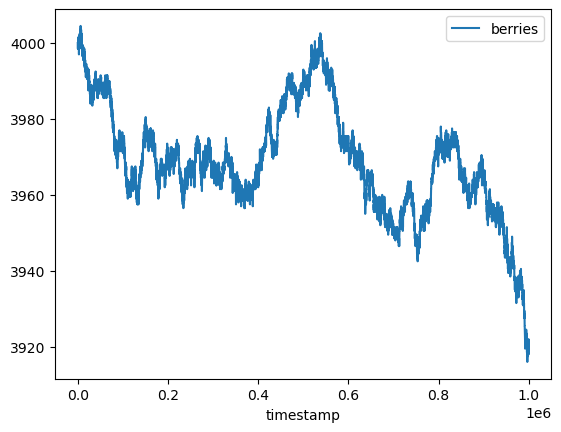

In [12]:
berries\
    .mid_price\
    .plot(label = "berries")

plt.legend()

## Verifying z-score

In [13]:
avg_rolling_price = berries\
    .mid_price\
    .rolling(200)\
    .mean()

std_rolling_price = berries\
    .mid_price\
    .rolling(200)\
    .std()

In [14]:
z_score = (berries.mid_price - avg_rolling_price)/std_rolling_price

<AxesSubplot:xlabel='timestamp'>

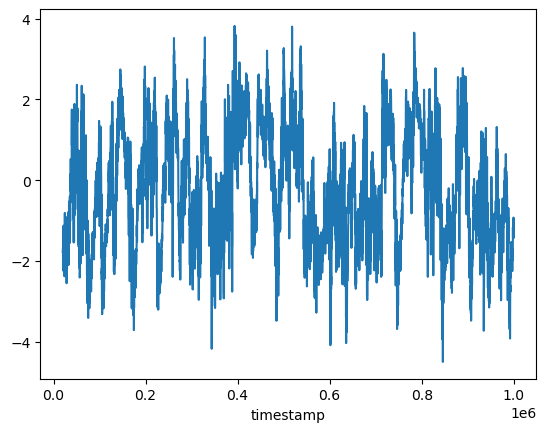

In [15]:
z_score.plot()

In [16]:
buy = z_score < -3
sell = z_score > 3

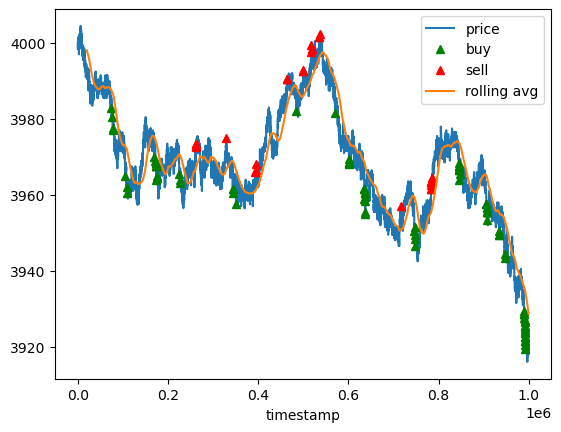

In [23]:
berries\
    .mid_price\
    .plot(label = "price")

berries[buy]\
    .mid_price\
    .plot(
        marker ='^', 
        color ='green', 
        linestyle= 'None',
        label = 'buy'
    )

berries[sell]\
    .mid_price\
    .plot(
        marker ='^', 
        color ='red', 
        linestyle= 'None',
        label = 'sell'
    )

avg_rolling_price.plot(label = "rolling avg")

plt.legend()

In [19]:
price_berries = berries.mid_price

<AxesSubplot:xlabel='timestamp'>

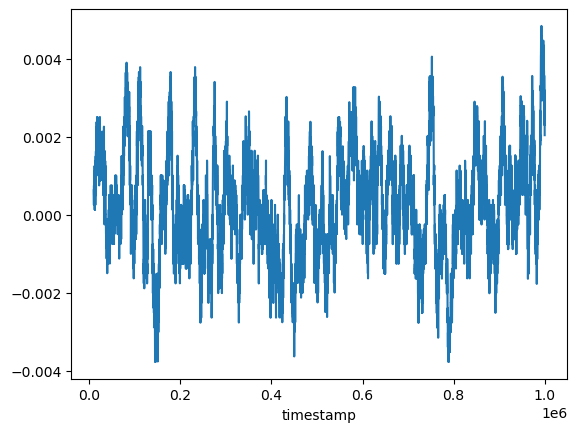

In [22]:
(price_berries.shift(100)/price_berries -1)\
    .plot()

# Comparing multiple days

In [24]:
data0 = pd.read_csv(
    "data/round3/prices_round_3_day_0.csv",
    sep = ';'
)

data1 = pd.read_csv(
    "data/round3/prices_round_3_day_1.csv",
    sep = ';'
)

data2 = pd.read_csv(
    "data/round3/prices_round_3_day_2.csv",
    sep = ';'
)

In [25]:
berries0 = data0.query("product == 'BERRIES'")\
    .set_index("timestamp")\
    .mid_price

berries1 = data1.query("product == 'BERRIES'")\
    .set_index("timestamp")\
    .mid_price

berries2 = data2.query("product == 'BERRIES'")\
    .set_index("timestamp")\
    .mid_price

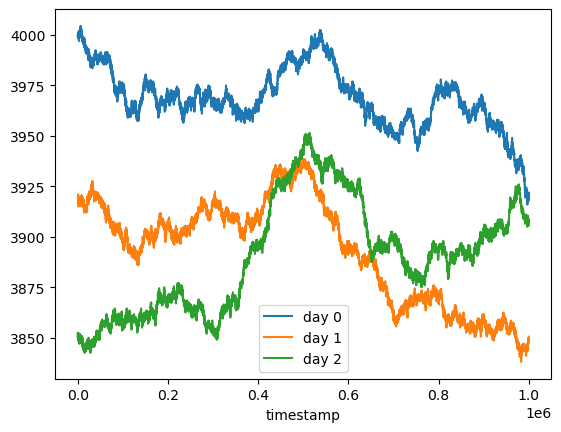

In [27]:
berries0.plot(label = "day 0")
berries1.plot(label = "day 1")
berries2.plot(label = "day 2")

plt.legend()

In [29]:
berries0.corr(berries1), berries1.corr(berries2)

(0.7384914731025591, -0.028704911755839915)

In [34]:
buy = berries0.index == 2.5e5
sell = berries0.index == 5e5

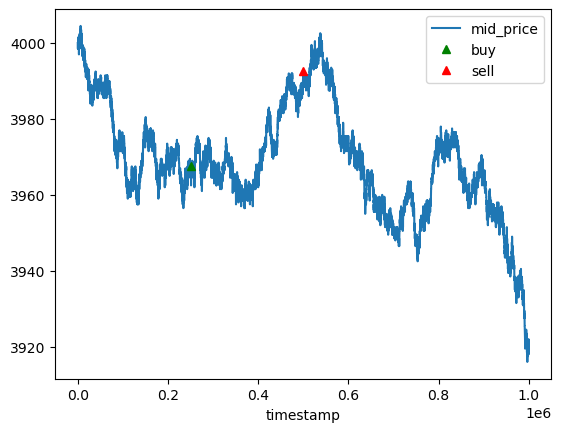

In [36]:
berries0.plot()

berries0[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)

berries0[sell].plot(
    marker ='^', 
    color ='red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()

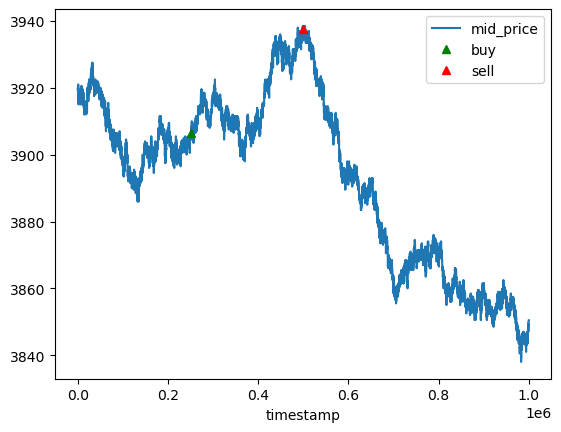

In [37]:
berries1.plot()

berries1[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)

berries1[sell].plot(
    marker ='^', 
    color ='red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()

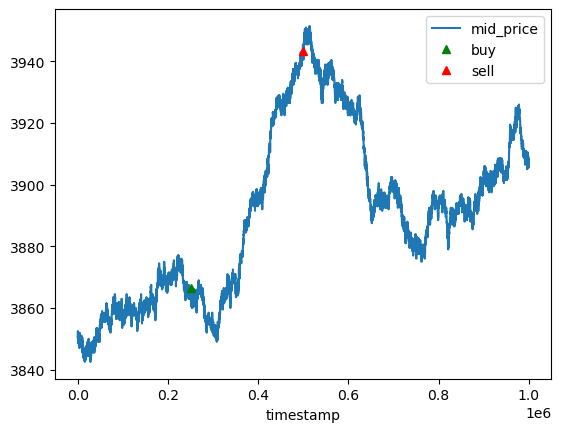

In [38]:
berries2.plot()

berries2[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)

berries2[sell].plot(
    marker ='^', 
    color ='red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()

In [44]:
berries0[buy].values, berries0[sell].values, berries0.iloc[-1]

(array([3967.5]), array([3992.5]), 3920.5)

In [47]:
MAX_VOLUME= 250
pnl0 = MAX_VOLUME*(2*berries0[sell].values- (berries0[buy] + berries0.iloc[-1]))
pnl1 = MAX_VOLUME*(2*berries1[sell].values- (berries1[buy] + berries1.iloc[-1]))
pnl2 = MAX_VOLUME*(2*berries2[sell].values- (berries2[buy] + berries2.iloc[-1]))

In [48]:
pnl0, pnl1, pnl2

(timestamp
 250000    24250.0
 Name: mid_price, dtype: float64,
 timestamp
 250000    29500.0
 Name: mid_price, dtype: float64,
 timestamp
 250000    28000.0
 Name: mid_price, dtype: float64)

# Liquidity

In [55]:
selling_berries = berries.loc[4.8e5:5.2e5]

In [60]:
sell_mask = selling_berries.columns.str.contains("bid_volume")

<AxesSubplot:xlabel='timestamp'>

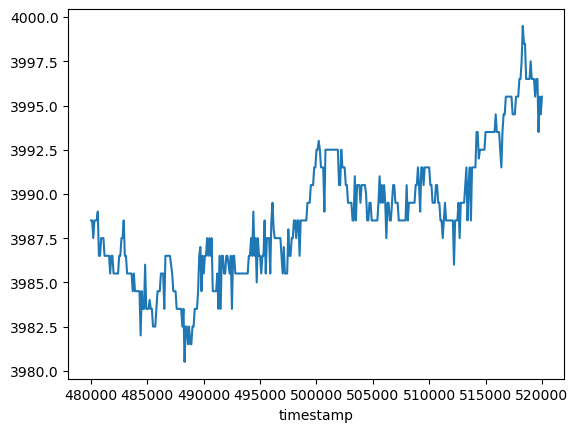

In [65]:
selling_berries.mid_price.plot()

In [63]:
selling_berries[selling_berries.columns[sell_mask]]\
    .sum(axis=1)\
    .describe()

count    401.000000
mean      65.069825
std        6.981054
min       50.000000
25%       60.000000
50%       65.000000
75%       70.000000
max       85.000000
dtype: float64